## Monte Carlo - Euler Discretization - Part II

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

*Euler Discretization – continued.*

[*********************100%%**********************]  1 of 1 completed


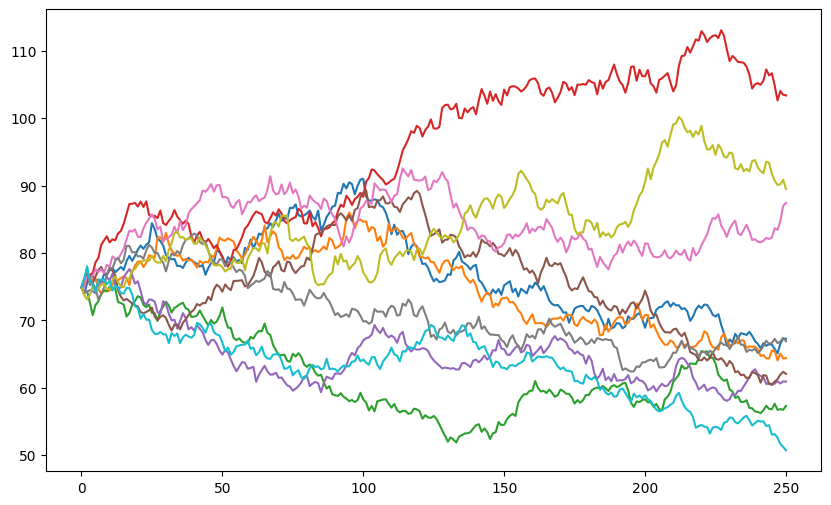

In [12]:
import numpy as np  
import pandas as pd  
import yfinance as yf
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

ticker = 'PG'  
data = yf.download(ticker, start='2007-1-1', end='2017-3-22')['Adj Close']

log_returns = np.log(1 + data.pct_change())
stdev = log_returns.std() * 250 ** 0.5
#stdev = stdev.values

r = 0.025
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])


plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [13]:
log_returns.tail()

Date
2017-03-15    0.004386
2017-03-16    0.000438
2017-03-17   -0.004824
2017-03-20    0.002415
2017-03-21   -0.000329
Name: Adj Close, dtype: float64

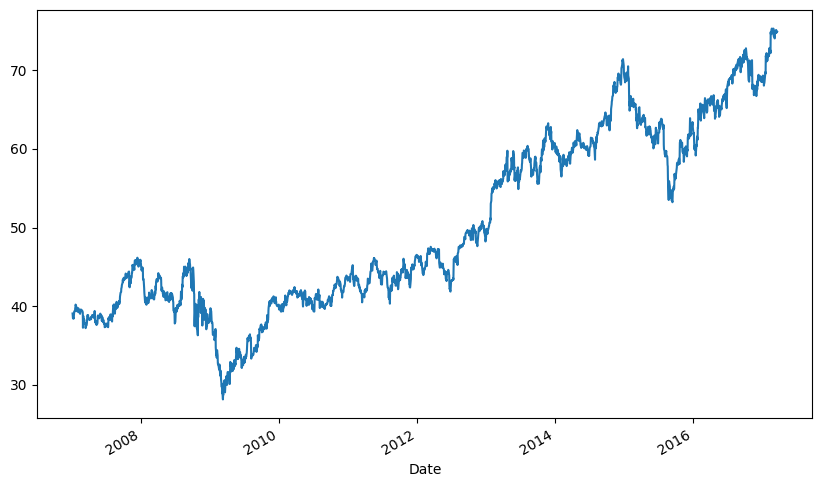

In [14]:
data.plot(figsize=(10, 6));

In [17]:
S

array([[74.89601135, 74.89601135, 74.89601135, ..., 74.89601135,
        74.89601135, 74.89601135],
       [73.85986006, 75.73922088, 74.18470358, ..., 74.62155325,
        74.15524969, 76.11067954],
       [75.53584021, 75.72582659, 74.31822391, ..., 74.42941124,
        73.66352382, 75.56260967],
       ...,
       [66.54232621, 65.04354475, 56.82428839, ..., 79.07848183,
        52.89270246, 89.7887305 ],
       [67.28967914, 64.34280521, 56.7366189 , ..., 78.0139161 ,
        52.27047076, 91.58013638],
       [67.26392138, 64.39417559, 57.30535589, ..., 76.9010638 ,
        52.75173813, 91.60459099]])

******

Use numpy.maximum to create a vector with as many elements as there are columns in the S matrix.

In [15]:
p = np.maximum(S[-1] - 110, 0)

In [16]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [4]:
p.shape

(10000,)

Use the following formula to forecast the price of a stock option.

$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [5]:
np.sum(p)

3551595.7558521647

In [6]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

346.39065442003744

Because this pricing model is based on random iterations, you will obtain a different result every time you re-run the code in this document. Expand the “Kernel” list from the Jupyter menu and click on “Restart and run all”/”Restart & run all cells” to verify this is true.